In [2]:
#pip install requests

In [3]:
#pip install pandas

In [4]:
#pip install json

In [5]:
import requests
import pandas as pd
import json

Setting up User-Agent for the API

In [6]:
headers = {
    'User-Agent': 'Ville Antila, Statistical Methods coursework',
    'From': 'vvanti@utu.fi'
}

In [7]:
url = 'https://prices.runescape.wiki/api/v1/osrs/latest'

Base Access to the RuneLite Grand Exchange API

In [293]:
'https://prices.runescape.wiki/api/v1/osrs/latest'

'https://prices.runescape.wiki/api/v1/osrs/latest'

id's meaning can be found from https://oldschool.runescape.wiki/w/Module:GEIDs/data

In [294]:
response = requests.get(url, headers=headers)

In [295]:
response

<Response [200]>

Getting the data, latest prices

In [296]:
data = response.json()

In [297]:
data

{'data': {'2': {'high': 159,
   'highTime': 1668416837,
   'low': 158,
   'lowTime': 1668416790},
  '6': {'high': 192000,
   'highTime': 1668412892,
   'low': 185097,
   'lowTime': 1668416869},
  '8': {'high': 191876,
   'highTime': 1668412898,
   'low': 187750,
   'lowTime': 1668416333},
  '10': {'high': 188399,
   'highTime': 1668412886,
   'low': 184297,
   'lowTime': 1668416875},
  '12': {'high': 195000,
   'highTime': 1668412904,
   'low': 190000,
   'lowTime': 1668416459},
  '28': {'high': 98,
   'highTime': 1668403021,
   'low': 255,
   'lowTime': 1668413999},
  '30': {'high': 766,
   'highTime': 1668416901,
   'low': 100,
   'lowTime': 1668323614},
  '36': {'high': 499,
   'highTime': 1668416859,
   'low': 500,
   'lowTime': 1668415793},
  '39': {'high': 5, 'highTime': 1668416401, 'low': 5, 'lowTime': 1668416047},
  '40': {'high': 6, 'highTime': 1668416865, 'low': 5, 'lowTime': 1668416002},
  '41': {'high': 60, 'highTime': 1668416262, 'low': 36, 'lowTime': 1668416278},
  '42': 

Making Our Data Useful, Adding Mapping

In [51]:
url2 = 'https://prices.runescape.wiki/api/v1/osrs/mapping'

In [103]:
response = requests.get(url2, headers=headers)

In [104]:
response

<Response [200]>

In [105]:
mapping = response.json()

In [159]:
mapping

[{'examine': 'Fabulously ancient mage protection enchanted in the 3rd Age.',
  'id': 10344,
  'members': True,
  'lowalch': 20200,
  'limit': 8,
  'value': 50500,
  'highalch': 30300,
  'icon': '3rd age amulet.png',
  'name': '3rd age amulet'},
 {'examine': 'A beautifully crafted axe, shaped by ancient smiths.',
  'id': 20011,
  'members': True,
  'lowalch': 22000,
  'limit': 40,
  'value': 55000,
  'highalch': 33000,
  'icon': '3rd age axe.png',
  'name': '3rd age axe'},
 {'examine': 'A beautifully crafted bow carved by ancient archers.',
  'id': 12424,
  'members': True,
  'lowalch': 60000,
  'limit': 8,
  'value': 150000,
  'highalch': 90000,
  'icon': '3rd age bow.png',
  'name': '3rd age bow'},
 {'examine': 'A beautiful cloak woven by ancient tailors.',
  'id': 12437,
  'members': True,
  'lowalch': 34000,
  'limit': 8,
  'value': 85000,
  'highalch': 51000,
  'icon': '3rd age cloak.png',
  'name': '3rd age cloak'},
 {'examine': 'A fabulously ancient vine cloak as worn by the drui

In [308]:
merged = []
for m in mapping:
    try:
        merged.append({**data['data'][str(m['id'])], **m})
    except KeyError:
        continue

Merges data and mapping, skipping adding latest prices for 'id's' that dont have values.

In [309]:
merged

[{'high': 20788788,
  'highTime': 1668396884,
  'low': 20552780,
  'lowTime': 1668396934,
  'examine': 'Fabulously ancient mage protection enchanted in the 3rd Age.',
  'id': 10344,
  'members': True,
  'lowalch': 20200,
  'limit': 8,
  'value': 50500,
  'highalch': 30300,
  'icon': '3rd age amulet.png',
  'name': '3rd age amulet'},
 {'high': 363049500,
  'highTime': 1668219697,
  'low': 363049500,
  'lowTime': 1668307571,
  'examine': 'A beautifully crafted axe, shaped by ancient smiths.',
  'id': 20011,
  'members': True,
  'lowalch': 22000,
  'limit': 40,
  'value': 55000,
  'highalch': 33000,
  'icon': '3rd age axe.png',
  'name': '3rd age axe'},
 {'high': 782500000,
  'highTime': 1668399589,
  'low': 772000000,
  'lowTime': 1668301779,
  'examine': 'A beautifully crafted bow carved by ancient archers.',
  'id': 12424,
  'members': True,
  'lowalch': 60000,
  'limit': 8,
  'value': 150000,
  'highalch': 90000,
  'icon': '3rd age bow.png',
  'name': '3rd age bow'},
 {'high': 1790000

In [326]:
url3 = 'https://prices.runescape.wiki/api/v1/osrs/1h?timestamp=1668384000'

In [327]:
response = requests.get(url3, headers=headers)

In [328]:
data1 = response.json()

Data for the average prices in a 1h window, with a unix timestap (GMT:Mon Nov 14 2022 00:00:00 GMT+0000)

In [329]:
data1

{'data': {'2': {'avgHighPrice': 164,
   'highPriceVolume': 716764,
   'avgLowPrice': 161,
   'lowPriceVolume': 286773},
  '6': {'avgHighPrice': 190465,
   'highPriceVolume': 9,
   'avgLowPrice': 184029,
   'lowPriceVolume': 26},
  '8': {'avgHighPrice': 190581,
   'highPriceVolume': 3,
   'avgLowPrice': 186320,
   'lowPriceVolume': 25},
  '10': {'avgHighPrice': 186651,
   'highPriceVolume': 7,
   'avgLowPrice': 182193,
   'lowPriceVolume': 23},
  '12': {'avgHighPrice': 192162,
   'highPriceVolume': 2,
   'avgLowPrice': 187923,
   'lowPriceVolume': 25},
  '30': {'avgHighPrice': 650,
   'highPriceVolume': 39,
   'avgLowPrice': None,
   'lowPriceVolume': 0},
  '36': {'avgHighPrice': 500,
   'highPriceVolume': 31,
   'avgLowPrice': 288,
   'lowPriceVolume': 17},
  '39': {'avgHighPrice': 5,
   'highPriceVolume': 4305,
   'avgLowPrice': 4,
   'lowPriceVolume': 8011},
  '40': {'avgHighPrice': 6,
   'highPriceVolume': 8227,
   'avgLowPrice': 6,
   'lowPriceVolume': 11040},
  '41': {'avgHighPric

1h average one month ago GMT:Thu Oct 13 2022 23:00:00 GMT+0000

In [330]:
url4 = 'https://prices.runescape.wiki/api/v1/osrs/1h?timestamp=1665702000'

In [331]:
response = requests.get(url4, headers=headers)

In [332]:
data1old = response.json()

In [333]:
data1old

{'data': {'2': {'avgHighPrice': 168,
   'highPriceVolume': 849278,
   'avgLowPrice': 162,
   'lowPriceVolume': 638519},
  '6': {'avgHighPrice': 181243,
   'highPriceVolume': 5,
   'avgLowPrice': 170644,
   'lowPriceVolume': 12},
  '8': {'avgHighPrice': 177867,
   'highPriceVolume': 6,
   'avgLowPrice': 170552,
   'lowPriceVolume': 11},
  '10': {'avgHighPrice': 193707,
   'highPriceVolume': 2,
   'avgLowPrice': 180394,
   'lowPriceVolume': 13},
  '12': {'avgHighPrice': 192126,
   'highPriceVolume': 4,
   'avgLowPrice': 180468,
   'lowPriceVolume': 14},
  '28': {'avgHighPrice': 333,
   'highPriceVolume': 2,
   'avgLowPrice': 370,
   'lowPriceVolume': 26},
  '30': {'avgHighPrice': 925,
   'highPriceVolume': 35,
   'avgLowPrice': None,
   'lowPriceVolume': 0},
  '36': {'avgHighPrice': 687,
   'highPriceVolume': 69,
   'avgLowPrice': 275,
   'lowPriceVolume': 148},
  '39': {'avgHighPrice': 5,
   'highPriceVolume': 7400,
   'avgLowPrice': 5,
   'lowPriceVolume': 5558},
  '40': {'avgHighPrice

Compare data1 and data1old, to look for the largest procentage increases in price.

In [464]:
pros2 = []
for m in data1['data']:
    try:
        pros2.append([(data1['data'][str(m)]['avgHighPrice']-data1old['data'][str(m)]['avgHighPrice'])/data1old['data'][str(m)]['avgHighPrice'],data1['data'][str(m)]['avgHighPrice']])
    except TypeError:
        pros2.append([0, 0])
    except KeyError:
        pros2.append([0, 0])

In [465]:
pros2

[[-0.023809523809523808, 164],
 [0.05088196509658304, 190465],
 [0.0714803757864022, 190581],
 [-0.0364261487710821, 186651],
 [0.0001873770338215546, 192162],
 [-0.2972972972972973, 650],
 [-0.27219796215429404, 500],
 [0.0, 5],
 [-0.14285714285714285, 6],
 [0.43902439024390244, 59],
 [-0.3898305084745763, 36],
 [0.049019607843137254, 107],
 [-0.03435114503816794, 253],
 [0, 0],
 [0, 0],
 [0, 0],
 [3.2, 21],
 [2.857142857142857, 27],
 [0.0, 1],
 [0.4, 7],
 [11.0, 12],
 [1.4615384615384615, 32],
 [0.17391304347826086, 54],
 [0.5185185185185185, 41],
 [0.22033898305084745, 72],
 [0.9722222222222222, 71],
 [0.006211180124223602, 324],
 [0.030612244897959183, 202],
 [0.032467532467532464, 1113],
 [0, 0],
 [-0.1323529411764706, 118],
 [0.04838709677419355, 65],
 [-0.08376963350785341, 175],
 [-0.012087912087912088, 899],
 [-0.07656643264008478, 6971],
 [0.06007067137809187, 900],
 [0.2149122807017544, 2216],
 [0.5008201202843083, 2745],
 [0.6644549763033175, 3512],
 [0.18773466833541927, 9

Looking for notably large prosentage increases and values, with relatively large volumes of trades. Take into account "buying limit"(merged['limit'])
3.2% increase to 21, "Oak shortbow (u)" = 54,
10.7% increase to 750, "Defence potion(3)" = 133,
And so on...

Only taking taking into account items that cost more than 1000 and have seen an increase of 30%

In [470]:
new = []
for x in range(2823):
    if pros2[x][0]>0.3 and pros2[x][1]>1000:
        new.append(pros2[x])

In [471]:
new

[[0.5008201202843083, 2745],
 [0.6644549763033175, 3512],
 [0.4726107226107226, 2527],
 [0.6568627450980392, 3211],
 [0.9303571428571429, 1081],
 [0.47031700288184436, 2551],
 [0.5630130371801062, 3237],
 [6.275147928994083, 2459],
 [2.300395256916996, 1670],
 [0.8166144200626959, 1159],
 [0.6672025723472669, 1037],
 [1.561117578579744, 2200],
 [2.388739946380697, 1264],
 [0.7181263858093127, 6199],
 [92.6875, 1499],
 [2.9787516600265604, 2996],
 [2.309049255441008, 14444],
 [0.5012987012987012, 6936],
 [0.4155005382131324, 1315],
 [217.39080459770116, 19000],
 [4.0, 4000],
 [0.3111413043478261, 2895],
 [0.3868828297715549, 1882],
 [6.471575622879869, 127749],
 [0.35209424083769636, 1033],
 [20.62162162162162, 4000],
 [0.3191862504384427, 3761],
 [8.97, 1994],
 [31.2, 5796],
 [0.3907946157186279, 3203],
 [0.43075453677172876, 2996],
 [1.2732919254658386, 1098],
 [0.4875538087216919, 39740],
 [3.0287610619469025, 1821],
 [0.3134020618556701, 1911],
 [0.3185053380782918, 2964],
 [0.50608

In [472]:
new2 = []
for x in range(2823):
    if pros2[x][0]>0.2 and pros2[x][1]>10000:
        new2.append(pros2[x])

In [473]:
new2

[[2.309049255441008, 14444],
 [217.39080459770116, 19000],
 [6.471575622879869, 127749],
 [0.20143576158940396, 36283360],
 [0.259305840559564, 57073],
 [0.4875538087216919, 39740],
 [0.2347461425187272, 38571],
 [0.2978546876851962, 10950],
 [0.36305336518011977, 83318],
 [0.6910236705735576, 450000],
 [0.26202206368460085, 219530],
 [0.6988987728183194, 194230],
 [0.3089033640996282, 393243],
 [0.38319717376904394, 50116],
 [38.53488372093023, 15300],
 [0.5188840534659621, 58635],
 [9.66022315400469, 150000],
 [0.26355128057503413, 2589709],
 [0.35158414212034095, 4286714],
 [0.3998676033975158, 1124998],
 [1.6666666666666667, 20000],
 [1.1666666666666667, 13000],
 [0.24126217931527666, 13886],
 [0.27158662201687084, 29998],
 [1.0329425730820596, 13700],
 [1.0964495387195974, 14998],
 [0.5751167758989029, 87000],
 [0.5685374695975403, 34180],
 [0.25847281668633987, 384880],
 [0.48813949258189887, 580864],
 [0.22724953223337302, 57720],
 [0.49681775902855596, 204374],
 [0.370808889978

Calculating the how much money flows threw the economy in an hour, and seeing if this changed during the month.

In [488]:
x=0
for m in data1['data']:
    try:
        x=x+data1['data'][str(m)]['avgHighPrice']*data1['data'][str(m)]['highPriceVolume']+data1['data'][str(m)]['avgLowPrice']*data1['data'][str(m)]['lowPriceVolume']
    except TypeError:
        x=x+0
    except KeyError:
        x=x+0
print(x)

248415691508


In [489]:
x=0
for m in data1old['data']:
    try:
        x=x+data1old['data'][str(m)]['avgHighPrice']*data1old['data'][str(m)]['highPriceVolume']+data1old['data'][str(m)]['avgLowPrice']*data1old['data'][str(m)]['lowPriceVolume']
    except TypeError:
        x=x+0
    except KeyError:
        x=x+0
print(x)

284041710688


For data1 ie. Mon Nov 14 2022 00:00:00 GMT+0000, we get that in a 1h window 248 billion 415 million 691 thousand 508 gold flows through the market and on Thu Oct 13 2022 23:00:00 GMT+0000 it is 284 billion 41 million 710 thousand 688.
Using this to get a month by month basis and storing it in a Dataframe.

In [540]:
df = pd.DataFrame()
time_list = ['Mon Nov 14 2022 00:00:00', 'Thu Oct 13 2022 23:00:00', 'Tue Sep 13 2022 23:00:00', 'Sat Aug 13 2022 23:00:00', 'Wed Jul 13 2022 23:00:00', 'Mon Jun 13 2022 23:00:00', 'Fri May 13 2022 23:00:00', 'Wed Apr 13 2022 23:00:00', 'Mon Mar 14 2022 00:00:00', 'Mon Feb 14 2022 00:00:00', 'Fri Jan 14 2022 00:00:00', 'Tue Dec 14 2021 00:00:00']
volume_list= ['248 415 691 508', '284 041 710 688', '402 409 372 968', '266 464 292 587', '203 027 297 790', '94 902 585 904', '164 805 078 351', '186 611 526 581', '175 328 327 680', '114 402 865 062', '199 626 585 581', '154 497 596 171']

In [541]:
df['Time gmt'] = time_list
df['Volume'] = volume_list

In [542]:
df

,Time gmt,Volume
0,Mon Nov 14 2022 00:00:00,248 415 691 508
1,Thu Oct 13 2022 23:00:00,284 041 710 688
2,Tue Sep 13 2022 23:00:00,402 409 372 968
3,Sat Aug 13 2022 23:00:00,266 464 292 587
4,Wed Jul 13 2022 23:00:00,203 027 297 790
5,Mon Jun 13 2022 23:00:00,94 902 585 904
6,Fri May 13 2022 23:00:00,164 805 078 351
7,Wed Apr 13 2022 23:00:00,186 611 526 581
8,Mon Mar 14 2022 00:00:00,175 328 327 680
9,Mon Feb 14 2022 00:00:00,114 402 865 062


DataFrame of notable prosentage increases in value, between Mon Nov 14 2022 and Thu Oct 13

In [545]:
df2 = pd.DataFrame()

In [549]:
item_name = ['Kwuarm potion (unf)','Yellow partyhat','Bronze platelegs','Ranger boots','Guthans platebody','Zamorak chaps','Eldritch orb']
item_id = ['105','1040','1075','2577','4728','10372','24517']
item_cost = ['2 745','14 444','19 000','36 283 360','450 000','580 864','205 819 999']
item_volume = ['16 056','17','156','13','34','42','6']
item_limit = ['10 000','5','125','8','15','8','8']
item_pros= ['50%','230%','21 740%','20%','69%','49%','65%']

In [550]:
df2['Item Name'] = item_name
df2['Id'] = item_id
df2['Cost'] = item_cost
df2['Volume traded in 1h'] = item_volume
df2['Buying Limit'] = item_limit
df2['Prosentage Increase'] = item_pros

In [551]:
df2

,Item Name,Id,Cost,Volume traded in 1h,Buying Limit,Prosentage Increase
0,Kwuarm potion (unf),105,2 745,16 056,10 000,50%
1,Yellow partyhat,1040,14 444,17,5,230%
2,Bronze platelegs,1075,19 000,156,125,21 740%
3,Ranger boots,2577,36 283 360,13,8,20%
4,Guthans platebody,4728,450 000,34,15,69%
5,Zamorak chaps,10372,580 864,42,8,49%
6,Eldritch orb,24517,205 819 999,6,8,65%


Same thing for a 6 month period we find that viable investments Eldritch orb:147.6m change inc+ 286%.. Dexterous prayer scroll 15.9m change + 112% cost now 30.1m.. Dragon sword 48.7kchange + 100% 97.6k now ... Dragon metal lump 128.8kchange + 113% now 241.9k

Looking at inflation of a few common items.

Consumable items:Prayer potion(4), Saradomin brew(4), Super combat potion(4), Cooked karambwan, Anglerfish, Ranging potion(4)
Armor and Weapons:Abyssal whip, Bandos chestplate, Bandos tassets, Amulet of Fury, Dragon boots.
Using timestamp, timeseries, and the mapping.

In [ ]:
df3 =pd.DataFrame()

In [564]:
time_list2 = ['Mon Nov 14 2022 00:00:00', 'Thu Oct 13 2022 23:00:00', 'Tue Sep 13 2022 23:00:00', 'Sat Aug 13 2022 23:00:00', 'Wed Jul 13 2022 23:00:00', 'Mon Jun 13 2022 23:00:00', 'Fri May 13 2022 23:00:00', 'Wed Apr 13 2022 23:00:00', 'Mon Mar 14 2022 00:00:00', 'Mon Feb 14 2022 00:00:00', 'Fri Jan 14 2022 00:00:00', 'Tue Dec 14 2021 00:00:00']
Ppotion_price = [9059,9523,9790,12217,12555,12546,11790,10222,13027,12611,9613,9967]
Sbrew_price = [8722,7836,11082,7909,7836,7064,7534,7932,7933,6402,5577,4777]
Scombat_price = [10249,10270,10197,10742,10270,11020,11721,11737,12134,11149,9692,10151]
karambwan = [429,455,419,451,455,463,511,464,497,551,494,483]
Anglerfish = [1486,2192,1505,2091,2192,2247,2095,1861,1829,1430,1323,1552]
Rpotion_price = [674,521,726,857,521,574,444,511,549,411,630,448]

Ab_whip = [1479227,2172234,1804010,1998328,2172234,2198917,2317583,2685913,2689294,2279072,2055359,2101120]
B_chest = [26939220,30747874,29253544,29980712,30747874,29666153,29512400,27731012,25432307,24010315,22014235,26163227]
B_tassets = [21043118,22761916,24382149,22360929,22761916,22531214,22390120,21405868,21386806,22100950,20598360,27568187]
fury = [2589709,2169964,2068089,2525342,2169964,2232853,2087849,1928195,1941701,1919368,1726459,1765203]
D_boots = [105087,150033,109410,126782,150033,155586,165366,172355,173650,177588,183541,252991]

Calculating a hypothetical price index, with each consumable items having a weight of 500 and Armors and Weapons having a weight of 1.

In [596]:
CMarket_Basket=Ppotion_price[0]*500+Sbrew_price[0]*500+Scombat_price[0]*500+karambwan[0]*500+Anglerfish[0]*500+Rpotion_price[0]
CMarket_Basket

57850728

In [608]:
AMarket_Basket=Ab_whip[0]+B_chest[0]+B_tassets[0]+fury[0]+D_boots[0]
AMarket_Basket

52156361

In [613]:
TotMarket_Basket = []
for x in range (12):
    y=CMarket_Basket[x]+AMarket_Basket[x]
    TotMarket_Basket.append(y)
TotMarket_Basket

[67129535,
 73140542,
 74114428,
 73697950,
 74656542,
 73455297,
 73299262,
 70031854,
 69334307,
 66559204,
 59928084,
 71316176]

In [621]:
CMarket_Basket =[14973174,15138521,16497226,16705857,16654521,16670574,16825944,16108511,17710549,16071911,13350130,13465448]
AMarket_Basket =[52156361,58002021,57617202,56992093,58002021,56784723,56473318,53923343,51623758,50487293,46577954,57850728]
TotMarket_Basket =[67129535,73140542,74114428,73697950,74656542,73455297,73299262,70031854,69334307,66559204,59928084,71316176]

Price index reference point at Tue Dec 14.

In [617]:
totprice_index = []
for x in range(12):
    y=TotMarket_Basket[x]/TotMarket_Basket[11]*100
    totprice_index.append(y)
totprice_index

[94.12946510199875,
 102.5581377217982,
 103.92372692557154,
 103.3397387992312,
 104.68388265798212,
 102.99948920424448,
 102.78069592514328,
 98.19911544331822,
 97.22101056007266,
 93.32974331097057,
 84.03154426002874,
 100.0]

In [618]:
Cprice_index = []
for x in range(12):
    y=CMarket_Basket[x]/CMarket_Basket[11]*100
    Cprice_index.append(y)
Cprice_index

[111.19699842144131,
 112.42493380094001,
 122.51524048809961,
 124.06462079835741,
 123.68337837701353,
 123.80259461103708,
 124.95643665179206,
 119.62848172597005,
 131.5258801638089,
 119.35667495058465,
 99.14360071792635,
 100.0]

In [619]:
Aprice_index = []
for x in range(12):
    y=AMarket_Basket[x]/AMarket_Basket[11]*100
    Aprice_index.append(y)
Aprice_index

[90.15679284105119,
 100.26152307020233,
 99.5963300582838,
 98.51577494409405,
 100.26152307020233,
 98.15731791655242,
 97.61902736988894,
 93.21117445574755,
 89.23614236972092,
 87.2716640661808,
 80.5140325978266,
 100.0]

In [622]:
dfp = pd.DataFrame()

In [627]:
dfp['Time'] = time_list2
dfp['Consumables Market Basket'] = CMarket_Basket
dfp['Armors and Weapons Market Basket'] = CMarket_Basket
dfp['Total Value of Market Basket'] = TotMarket_Basket
dfp['Consumables Price Index'] = Cprice_index
dfp['Armors and Weapons Price index'] = Aprice_index
dfp['Price Index'] = totprice_index

In [628]:
dfp

,Time,Consumables Market Basket,Armors and Weapons Market Basket,Total Value of Market Basket,Consumables Price Index,Armors and Weapons Price index,Price Index
0,Mon Nov 14 2022 00:00:00,14973174,14973174,67129535,111.196998,90.156793,94.129465
1,Thu Oct 13 2022 23:00:00,15138521,15138521,73140542,112.424934,100.261523,102.558138
2,Tue Sep 13 2022 23:00:00,16497226,16497226,74114428,122.515240,99.596330,103.923727
3,Sat Aug 13 2022 23:00:00,16705857,16705857,73697950,124.064621,98.515775,103.339739
4,Wed Jul 13 2022 23:00:00,16654521,16654521,74656542,123.683378,100.261523,104.683883
5,Mon Jun 13 2022 23:00:00,16670574,16670574,73455297,123.802595,98.157318,102.999489
6,Fri May 13 2022 23:00:00,16825944,16825944,73299262,124.956437,97.619027,102.780696
7,Wed Apr 13 2022 23:00:00,16108511,16108511,70031854,119.628482,93.211174,98.199115
8,Mon Mar 14 2022 00:00:00,17710549,17710549,69334307,131.525880,89.236142,97.221011
9,Mon Feb 14 2022 00:00:00,16071911,16071911,66559204,119.356675,87.271664,93.329743


Cost of buying one of every Item. Now Using a 24h time window. GMT:Sun Nov 13 2022 00:00:00 starting point (note that times change slightly, since for the API to work with 24 window, unixtime needs to be devisible by 86400)

In [99]:
urll = 'https://prices.runescape.wiki/api/v1/osrs/24h?timestamp=1649808000'

In [100]:
response = requests.get(urll, headers=headers)

In [101]:
data24h = response.json()

In [104]:
cost = []
for m in data24h['data']:
    try:
        cost.append(data24h['data'][m]['avgHighPrice'])
    except TypeError:
        cost.append(0)
    except KeyError:
        cost.append(0)
x=0
for n in range(3522):
    try:
        x=x+cost[n]
    except SyntaxError:
        x=x+0
    except TypeError:
        x=x+0

In [105]:
len(cost)

3522

In [106]:
x

15047407032

In [107]:
time24 = ['Sun Nov 13 2022 00:00:00','Thu Oct 13 2022 00:00:00','Tue Sep 13 2022 00:00:00','Sat Aug 13 2022 00:00:00','Wed Jul 13 2022 00:00:00','Mon Jun 13 2022 00:00:00','Fri May 13 2022 00:00:00','Wed Apr 13 2022 00:00:00','Sun Mar 13 2022 00:00:00','Sun Feb 13 2022 00:00:00','Thu Jan 13 2022 00:00:00','Mon Dec 13 2021 00:00:00']
totalcost = [17632681861,17617792450,21252132825,17204517312,17680879921,16652444337,18243457295,15047407032,17696192986,14808920596,12786982595,12855194035]

In [146]:
df2 = pd.DataFrame()

In [147]:
df2['Time'] = time24
df2['Total Cost'] = totalcost

In [148]:
df2

,Time,Total Cost
0,Sun Nov 13 2022 00:00:00,17632681861
1,Thu Oct 13 2022 00:00:00,17617792450
2,Tue Sep 13 2022 00:00:00,21252132825
3,Sat Aug 13 2022 00:00:00,17204517312
4,Wed Jul 13 2022 00:00:00,17680879921
5,Mon Jun 13 2022 00:00:00,16652444337
6,Fri May 13 2022 00:00:00,18243457295
7,Wed Apr 13 2022 00:00:00,15047407032
8,Sun Mar 13 2022 00:00:00,17696192986
9,Sun Feb 13 2022 00:00:00,14808920596


Possibility of investing correctly over a year what pros of items went up in price?

Mon Dec 13 2021 00:00:00 to Sun Nov 13 2022 00:00:00 best investments, possibility of picking something that goes up.

In [113]:
url5 = 'https://prices.runescape.wiki/api/v1/osrs/1h?timestamp=1668297600'

response = requests.get(url5, headers=headers)

dataanow = response.json()

In [114]:
url6 = 'https://prices.runescape.wiki/api/v1/osrs/1h?timestamp=1639353600'

response = requests.get(url6, headers=headers)

dataaold = response.json()

merging tables ignoring KeyErrors, ie times when items do not have a price to be compared to

In [116]:
dataaold

{'data': {'2': {'avgHighPrice': 177,
   'highPriceVolume': 1015716,
   'avgLowPrice': 174,
   'lowPriceVolume': 253728},
  '6': {'avgHighPrice': 193609,
   'highPriceVolume': 1,
   'avgLowPrice': 185183,
   'lowPriceVolume': 12},
  '8': {'avgHighPrice': None,
   'highPriceVolume': 0,
   'avgLowPrice': 179035,
   'lowPriceVolume': 17},
  '10': {'avgHighPrice': 183459,
   'highPriceVolume': 2,
   'avgLowPrice': 180005,
   'lowPriceVolume': 10},
  '12': {'avgHighPrice': 188561,
   'highPriceVolume': 1,
   'avgLowPrice': 211567,
   'lowPriceVolume': 14},
  '28': {'avgHighPrice': 101,
   'highPriceVolume': 1,
   'avgLowPrice': 44,
   'lowPriceVolume': 9},
  '30': {'avgHighPrice': 914,
   'highPriceVolume': 29,
   'avgLowPrice': None,
   'lowPriceVolume': 0},
  '36': {'avgHighPrice': 179,
   'highPriceVolume': 57,
   'avgLowPrice': None,
   'lowPriceVolume': 0},
  '39': {'avgHighPrice': 3,
   'highPriceVolume': 5400,
   'avgLowPrice': 3,
   'lowPriceVolume': 1442},
  '40': {'avgHighPrice': 8

In [122]:
pros3 = []
for m in dataanow['data']:
    try:
        pros3.append([(dataanow['data'][str(m)]['avgHighPrice']-dataaold['data'][str(m)]['avgHighPrice'])/dataaold['data'][str(m)]['avgHighPrice'],dataanow['data'][str(m)]['avgHighPrice'],dataaold['data'][str(m)]['avgHighPrice']])
    except TypeError:
        continue
    except KeyError:
        continue

In [125]:
len(pros3)

1878

In [133]:
pos=0
neg=0
for x in range(1878):
    if pros3[x][0]>0:
        pos=pos+1
    else:
        neg=neg+1
pos/len(pros3)

0.5244941427050053

Even just the possibility of picking an item that goes up in a year is only around 52%

In [176]:
pos=0
neg=0
for x in range(1878):
    if pros3[x][0]>0.60:
        pos=pos+1
    else:
        neg=neg+1
pos/len(pros3)

0.16560170394036208

10% increase in price -> 0.395, 15% increase in price -> 0.354, 20% increase in price -> 0.319, 25% increase in price -> 0.284, 30% increase in price -> 0.264, 35% increase in price -> 0.243, 40% increase in price -> 0.222


In [180]:
y_pros = [52.4,47.1,43.9,41.7,39.5,37.4,35.4,33.3,31.9,29.9,28.4,27.2,26.4,25.0,24.3,23.1,22.2,21.3,20.2,19.8,19.1,18.5,17.7,17.3,16.5]
x_inc = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]

In [181]:
df3 = pd.DataFrame()

In [182]:
df3['Probability'] = y_pros
df3['Prosentage Increase In Price'] = x_inc

In [186]:
import matplotlib.pyplot as plt
plt.close("all")

Text(0, 0.5, 'Prosentage Increase In Price')

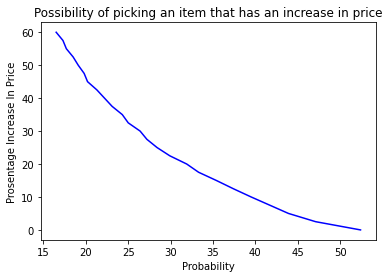

In [189]:
plt.plot(df3['Probability'],df3['Prosentage Increase In Price'], color="blue")
plt.title("Possibility of picking an item that has an increase in price")
plt.xlabel("Probability")
plt.ylabel("Prosentage Increase In Price")

In [190]:
df3

,Probability,Prosentage Increase In Price
0,52.4,0.0
1,47.1,2.5
2,43.9,5.0
3,41.7,7.5
4,39.5,10.0
5,37.4,12.5
6,35.4,15.0
7,33.3,17.5
8,31.9,20.0
9,29.9,22.5


On Sun Nov 13 i picked items that i beleived with my game knowlade would go up in price, now seeing if i was right on my predictions (Inquisitor's armour set, Inquisitor's mace, Voliteile/Eldritch/Harmonised orbs, Craw's bow,). (Sun Nov 13 2022 00:00:00 to Sat Dec 9 2022 00:00:00) On avrage a 19.04% increase in investment

In [195]:
url7 = 'https://prices.runescape.wiki/api/v1/osrs/24h?timestamp=1668297600'

response = requests.get(url7, headers=headers)

dataNov13 = response.json()

url8 = 'https://prices.runescape.wiki/api/v1/osrs/24h?timestamp=1670544000'

response = requests.get(url8, headers=headers)

dataDec9 = response.json()

In [203]:
item_name =['Inquisitors armour set','Inquisitors mace','Volatile orb','Eldritch orb','Harmonised orb','Craws bow','Ancestral robes set']
item_id = [24488,24417,24514,24517,24511,22547,21049]
Cost_Nov13 = [222603771,286071332,202784526,202015548,376320911,31768525,244247000]
Cost_Dec9 = [251365705,302283039,248558157,342232940,419694268,26664559,271518332]
pros_change = ['+12.9%','+5.67%','+22.6%','+69.4%','+11.5%','-19.1%','+11.2']

In [204]:
df4 = pd.DataFrame()
df4['Item Name'] = item_name
df4['Cost on November 13'] = Cost_Nov13
df4['Cost on December 9'] = Cost_Dec9
df4['Prosentage Change in Price'] = pros_change
df4

,Item Name,Cost on November 13,Cost on December 9,Prosentage Change in Price
0,Inquisitors armour set,222603771,251365705,+12.9%
1,Inquisitors mace,286071332,302283039,+5.67%
2,Volatile orb,202784526,248558157,+22.6%
3,Eldritch orb,202015548,342232940,+69.4%
4,Harmonised orb,376320911,419694268,+11.5%
5,Craws bow,31768525,26664559,-19.1%
6,Ancestral robes set,244247000,271518332,+11.2
